# PHAS2441 Session 2:  Histograms and normal distributions

## Grace Hymas 9th January 2018

<div class="alert alert-success"> <p>*  **Intended learning outcomes:** * </p>
By the end of this session, you should be able to:
<ul>
<li> Use Python to generate and plot a histogram; </li>
<li> Determine whether or not the data fits well to a normal distribution </li>
<li> Be able to determine a suitable bin size for a histogram </li>
</div>

The task this session is a "fill-in-the-blanks" style task. This notebook will guide you through what you need to do, and at various points you will find empty code cells that you need to complete in order to proceed.

Rename this notebook so that the title contains your name; when you have completed the task you will upload this notebook to Moodle.

## Getting started: Importing the data

The first thing we need to do is import the modules we will need. In this case we'll be using numpy and matplotlib.pyplot. We'll also tell the notebook to produce all the plots inside the notebook for convenience.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The following line makes all plot output generate as images within the notebook. 
%matplotlib notebook

# See the discussion below for when you might want to uncomment this line.
#plt.rcParams["patch.force_edgecolor"] = True

Data will now be impoerted from a text file into an array using numpy's loadtxt function. Remember file must be saved in the *same directory/folder as this notebook*. 

The file contains a single column of numbers representing the results of a series of measurements of the same quantity. `np.loadtxt`is used to import the contents of the file into an array called "data". 

The array is outputted as well as the number of data points to check that the file has imported correctly.


In [2]:
data = np.loadtxt("sampledata.txt", delimiter = ',', unpack=True) 

print("The full array is",data)

print("The number of data points is",len(data))

The full array is [  9.08784134  10.10662555  10.6043289    8.14670094  11.21532998
  10.09371284  10.4268221    9.512998     8.62930223   7.48937559
  10.65366662  10.82957068   8.78448663  10.9601158    9.90659032
   9.1582816   10.44614588   8.83495279  11.08507526  10.74786111
  10.3768063    9.94925924  10.98840191   8.1845716   11.11626203
   9.93193642   8.24589252   9.60070141   9.59625026   8.75870124
  10.26599281  10.03072825   9.17414148  10.95249503   9.81645277
   7.87208683   9.59434022   9.22794451   8.60092591  11.04193271
  10.55787516   9.75736188   9.96894073  10.35909125   9.08197603
   9.60704288  11.83643996  10.65500473   9.55931389  11.79449148
  11.52681481  11.22729724  10.86988402   9.84875052  10.05911294
  10.2443348    9.78448166  10.18996261   8.85726152  11.40313014
   9.30652172  10.15578731  10.89652947   9.37932207   9.60507078
  10.38731808   8.91990775   9.15388917  10.91798911   8.96221918
   8.03327801  10.45508301   7.76131074  10.03609924   9.5

We can check if the data has been imported successfully by seeing if that the average value is around 10 (this is a given fact).

In [3]:
print("The mean of the data is ", np.mean(data))

The mean of the data is  9.79322812277


### Creating a histogram

In theory, because our data is a set of repeated measurements of the same quantity, the distribution of the values should follow a Gaussian (normal) distribution, i.e. when we plot a histogram of the data, its shape should fit

$$ f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
where $\bar{x}$ is the mean value of the data, and $\sigma$ the standard deviation.

To see if this is true, we'll first plot the data as a histogram. We'll use the `plt.hist` function to automatically sort the data into bins and plot the resulting histogram:

<IPython.core.display.Javascript object>


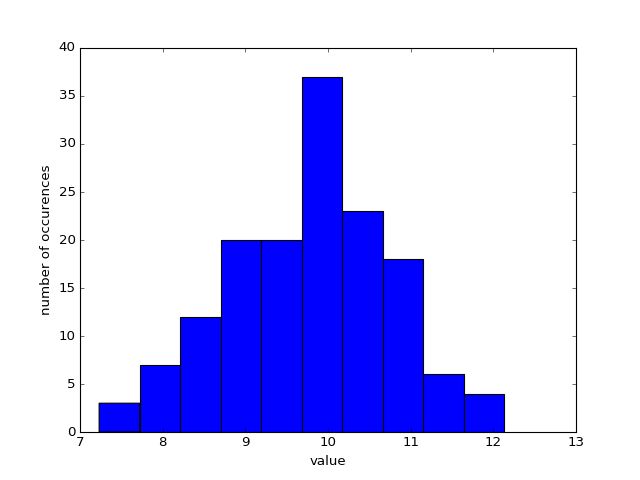

In [4]:
plt.figure()

plt.hist(data)

plt.xlabel("value")
plt.ylabel("number of occurences");

However, it's often useful to be able to see the outline of the histogram bins, which is turned off by default in Matplotlib 2. You can do this in one of two ways:

<IPython.core.display.Javascript object>


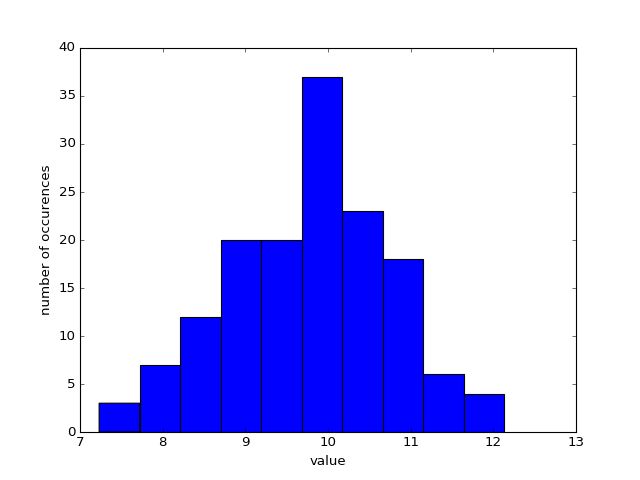

In [5]:
# 1. Include borders explicitly in the plt.hist statement:

plt.figure()
plt.hist(data, edgecolor='black') # you can set the edgecolor to anything, black is probably best
plt.xlabel("value")
plt.ylabel("number of occurences");

# 2. The following line will globally include borders in all plt.hist (and other bar-type plots) - 
# most useful if you include it in the preamble cell with the import statements 

#plt.rcParams["patch.force_edgecolor"] = True

# Which one you choose to use is up to you!

By default, the matplotlib hist command puts the data into 10 bins. You can see all the possible options in the documentation http://matplotlib.org/api/pyplot_api.html?highlight=hist#matplotlib.pyplot.hist, but in general the only things you're likely to need to change are:
* The number of bins.
* Whether or not the histogram is normalised (normed) - in this case the integral of the histogram will be equal to 1.

For example, this will sort the data into 15 bins, and normalize the histogram:

<IPython.core.display.Javascript object>


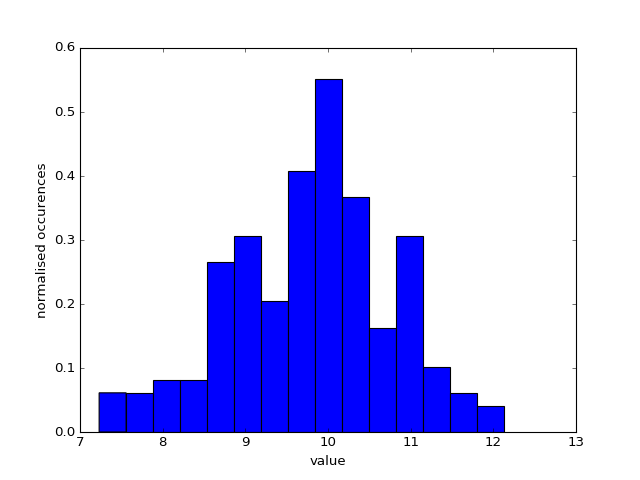

In [6]:
plt.figure()
# 15 bins, normalized:
plt.hist(data,bins=15,normed=True,edgecolor='k') # 'k' as abbreviation for black.

plt.xlabel("value")
plt.ylabel("normalised occurences") ; # semicolon at end suppresses unwanted IPython <output>

### How well does this fit to a Gaussian?

Our data looks as though it may be roughly Gaussian. How can we check this?

We'll use another python module: scipy.stats, to find out. (Documentation link: https://docs.scipy.org/doc/scipy/reference/stats.html )

In [7]:
import scipy.stats as stats

Specifically, we'll use norm.fit to fit the data that we used in the histogram to a Gaussian, and give us the two parameters $\bar{x}$ and $\sigma$.

In [8]:
x0, sigma = stats.norm.fit(data)
print ("Fitted Gaussian: \n Mean value ", x0, "with standard deviation", sigma)

Fitted Gaussian: 
 Mean value  9.79322812277 with standard deviation 0.974322178751


We can see that we obtain the same mean as we got before from np.mean.

Now we want to plot the fitted Gaussian on top of the histogram to see how good the fit is. In the cell below, write a suitably-named and documented function that will return a Gaussian 
$$y = \frac{1}{\sigma \sqrt{2\pi}} \exp \left[-\frac{(x-\bar{x})^2}{2\sigma^2}\right], $$
for an input $x, \bar{x}$, and $\sigma$.


In [9]:
def gaussian():
    """
    Calculates and returns Guassian distribution
    Inputs: x, xbar and sigma
    Output: y
    """
    y = (1/(sigma*((2*np.pi)**0.5)))*(np.exp(-((x-x0)**2)/(2*(sigma**2))))
    
    return y


Now complete the cell below to:
1. use np.linspace to create an array of 100 x-values for the fitted line starting at 7 and finishing at 13
2. Use your function to create a corresponding array of y-values with a Gaussian form.

In [10]:
x = np.linspace(7,13,100)
y = gaussian()

The following cell will replot the (normalised) histogram, a blue line from your generated x and y, and another (red) line.

<IPython.core.display.Javascript object>


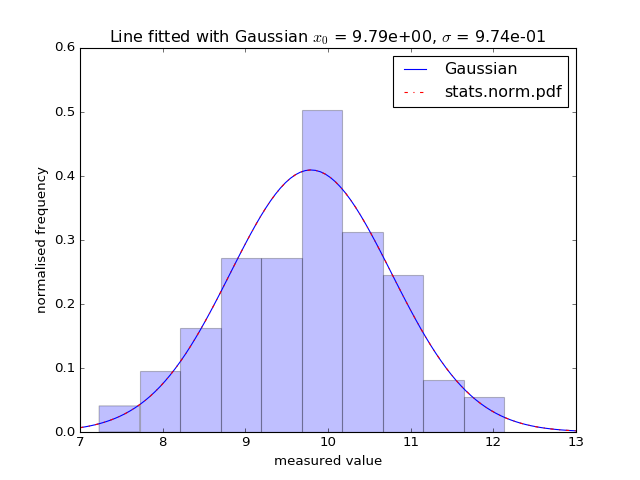

In [11]:
gaussian = stats.norm.pdf(x,x0,sigma) # see next text cell for explanation

plt.figure()
plt.hist(data, normed=True,alpha=0.25,edgecolor='k')
plt.plot(x,y,'b-', label='Gaussian')
plt.plot(x,gaussian,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:8.2e}, $\sigma$ = {1:8.2e}'.format(x0,sigma))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

If you've done this correctly, you should find that the red dashed line matches *exactly* with your calculated line (the solid blue line). If it doesn't, go back and correct your function code until it does! 

Let's look at how the red line was generated - it uses the `stats.norm.pdf` function, which generates the probability density function ("pdf"), i.e. a Gaussian, for the given values of x0 and sigma. It's probably easier to use than generating your own Gaussian, so in future you can use this if you wish.

Note also:
1. the extra option "alpha=0.25" in the hist function - this makes the histogram bars transparent, which makes the graph look a lot more visually clear when you're plotting lines on top of a histogram, or overlaying two histograms.
2. The title of the graph includes the fitted parameters by using a Python `.format`. This is often useful to be able to do, so feel free to copy and paste this formatting to other plots if you want.


### More data = a better fit?

We only have 150 data points at the moment. To give you an idea of how data distributions become more Gaussian as the data set size increases, we're going to generate some "fake" data so we can easily change the number of data points. 

The numpy function "random" will generate random numbers with a normal distribution for us.

In [12]:
npoints = 10000 # the number of data points we want
mean_x = 10     # roughly the same as the data set above
stdev = 1       # roughly the same as the data set above

# Our fake data set. Don't do this in a lab course!
new_data = np.random.normal(mean_x,stdev,npoints)

In the cell below, 
1. Use stats.norm.fit to find the actual mean and standard deviation of new_data. Are these exactly equal to 10 and 1?
2. Use stats.norm.pdf to generate a set of y values (use the existing set of x values, if you want)
3. Plot a histogram of the data, with the fitted line on top (just as above).
4. Experiment with the number of points, `npoints` in the cell above.
4. Experiment with the number of bins. Do more bins always give better results?
5. **Use further text and code cells** to demonstrate your results for two or three different scenarios (i.e. vary the bin ranges and/or the number of data points).

In [13]:
Rmean_x, Rstdev = stats.norm.fit(new_data)
print ("Fitted Gaussian: \n Mean value ", Rmean_x, "with standard deviation", Rstdev)


Fitted Gaussian: 
 Mean value  10.0105787592 with standard deviation 0.991249438617


These values are therefore not exactly equal to 10 and 1. More data points will produce values closer to 10 and 1 but statistical methods imply a small number such as 10000 will not output the value exactly needed.

In [14]:
y1 = stats.norm.pdf(x,Rmean_x,Rstdev)
gaussian1 = stats.norm.pdf(x,Rmean_x,Rstdev) 

<IPython.core.display.Javascript object>


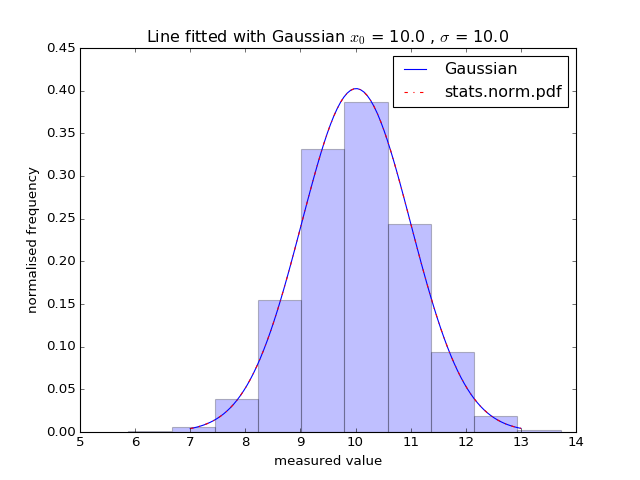

In [15]:
gaussian1 = stats.norm.pdf(x,Rmean_x,Rstdev)
plt.figure()
plt.hist(new_data, normed=True,alpha=0.25,edgecolor='k')
plt.plot(x,y1,'b-', label='Gaussian')
plt.plot(x,gaussian1,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian $x_0$ = {0:4.1f} , $\sigma$ = {0:3.1f}'.format(Rmean_x,Rstdev))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

Please provide number of data points
20000
Fitted Gaussian: 
 Mean value  10 with standard deviation 1


/Users/gracehymas/Downloads/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


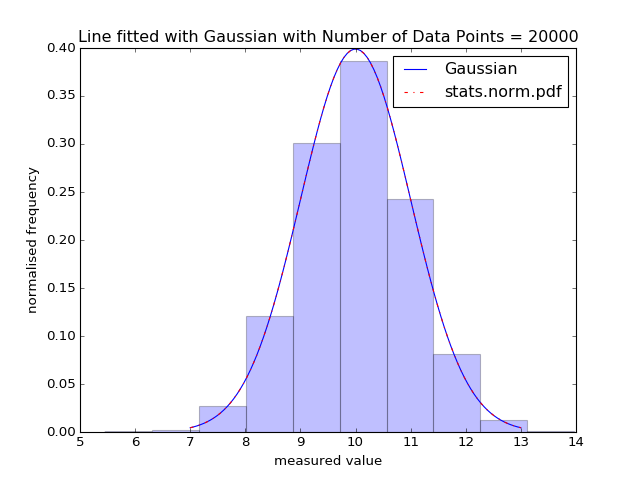

In [16]:
print("Please provide number of data points")
n1 = float(input()) 
mean_x = 10     
stdev = 1
new_data1 = np.random.normal(mean_x,stdev,n1)
Rmean_x, Rstdev = stats.norm.fit(new_data1)
y2 = stats.norm.pdf(x,mean_x,stdev)
print ("Fitted Gaussian: \n Mean value ", mean_x, "with standard deviation", stdev)
gaussian2 = stats.norm.pdf(x,mean_x,stdev) # see next text cell for explanation
plt.figure()
plt.hist(new_data1, normed=True,alpha=0.25,edgecolor='k')
#plt.hist(new_data1,alpha=0.25,edgecolor='k') use to see exactly how many data points are in each bin
plt.plot(x,y2,'b-', label='Gaussian')
plt.plot(x,gaussian2,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian with Number of Data Points = {0:3.0f}'.format(n1))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

Please provide number of bins
50


<IPython.core.display.Javascript object>


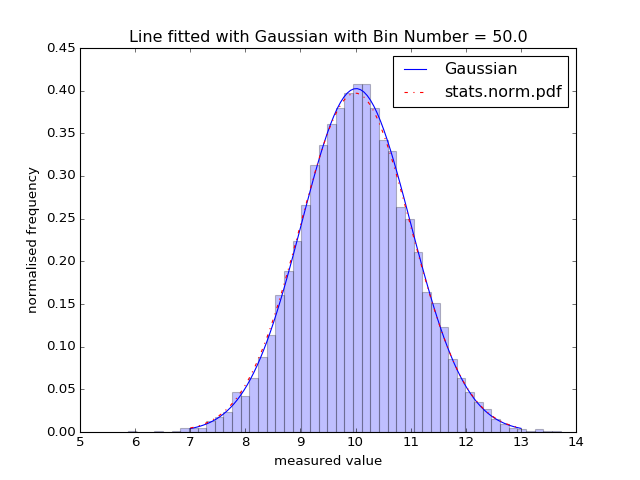

/Users/gracehymas/Downloads/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
/Users/gracehymas/Downloads/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:611: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)


In [17]:
print("Please provide number of bins")
b = float(input()) 
gaussian1 = stats.norm.pdf(x,Rmean_x,Rstdev)
plt.figure()
plt.hist(new_data,bins=b, normed=True,alpha=0.25,edgecolor='k')
plt.plot(x,y1,'b-', label='Gaussian')
plt.plot(x,gaussian1,'r-.', label="stats.norm.pdf")
plt.legend()
plt.xlabel('measured value')
plt.ylabel('normalised frequency')
title_label=('Line fitted with Gaussian with Bin Number = {0:3.1f}'.format(b))
# n.b. number format 8.2e : *e*xponential format, *8* chars total, with *2* decimal places
plt.title(title_label) ;

Increasing number of data points decreases residual which is the the (vertical) distance between the data point and the fitted line which means that the fits become more closely related. However past a certain point the number of bins will limit the change in the graph according to the change in data points.

Increasing number of bins makes it look more Gaussian until number of bins exceeds number of points. Therefore increasing number of bins increases the number of data points required for it to resemble a Gaussian more closely and the if the number of bins are kept the same but the number of points are increased then the data will look less closely related.

One source online quotes that the simplest method to find optimal number of bins is to set the number of bins equal to the square root of the number of values you are binning.



In conclusion the number of bins and the number of data points must be balanced in order for the graph to be as close to a Gaussian distribultion as possible.

### When will I need to use this?

Fitting a histogram to a Gaussian is particularly useful when you've fitted some data and want to check how good the fit is. If a fit models the data well, we'd expect the distribution of the *residuals* to be Gaussian.

<div class="alert alert-success"> **Residual**: the (vertical) distance between the data point and the fitted line - we looked at this when we were doing least squares fits in PHAS1240. </div>

This is fairly intuitive. For a good fit, we'd expect roughly as many data points above our fitted line as below, and for most of the data points to be close to the line, with fewer further away.

In sessions 3 and 4, we'll be fitting data to functions, and then using the distribution of the residuals to consider *quantitatively* how well a function fits to our data. 